In [6]:
#here we test all the components.


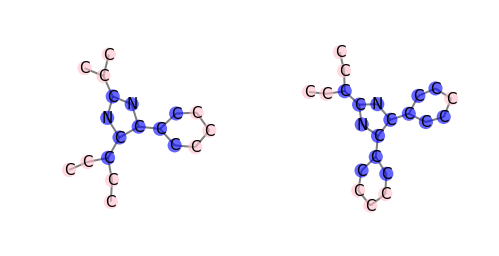

In [7]:

'''
first we test the core/interface extractor, since it is most essential
'''
%matplotlib inline
from eden.converter.graph.gspan import gspan_to_eden
import utils.draw as myutils
import utils.myeden as myed
import eden.graph as eg
import graphlearn as gl


#get a graph
gr = gspan_to_eden( 'data/bursi.pos.gspan' )
g=gr.next()


#lets see..
a=gl.extract_core_and_interface(1,g,radius_list=[2,3],thickness_list=[2],vectorizer=myed.MyVectorizer())
myutils.drawgraphs([ a[0].graph,a[1].graph ])


SGDClassifier(alpha=0.0474698749788, average=False, class_weight='auto',
       epsilon=0.1, eta0=0.0742746195509, fit_intercept=True,
       l1_ratio=0.15, learning_rate='invscaling', loss='log', n_iter=5,
       n_jobs=4, penalty='l2', power_t=0.473908382138, random_state=None,
       shuffle=True, verbose=0, warm_start=False)
interface: 24577


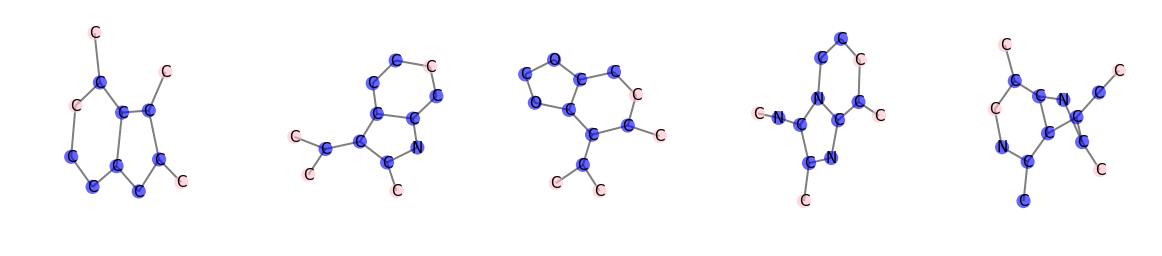

interface: 319520


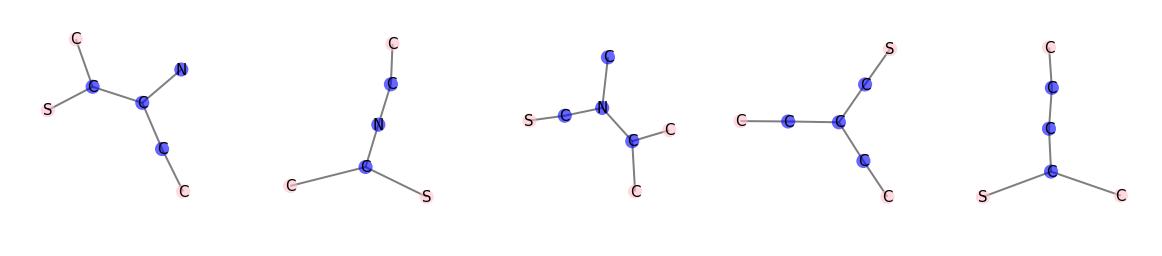

interface: 106534


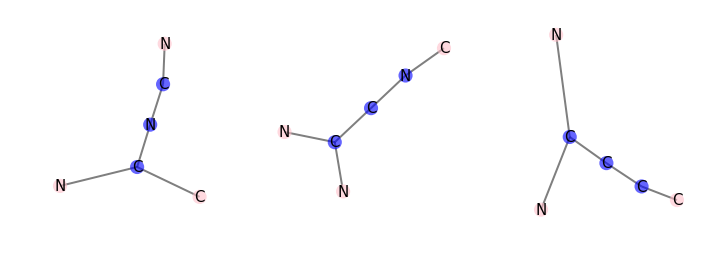

interface: 401454


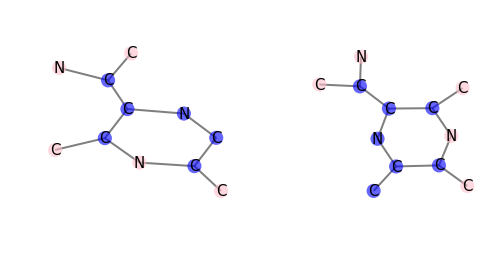

interface: 770162


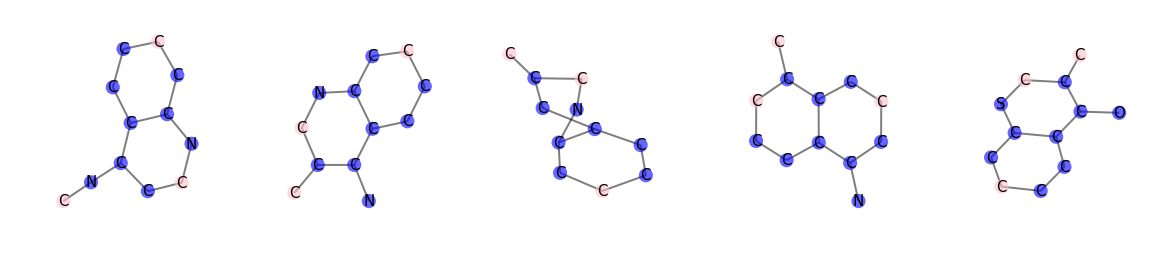

In [9]:
'''
second is reading a grammar and training an estimator
'''
import os
os.nice(19)
%matplotlib inline
import utils.draw as myutils
import graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools

gr = gspan_to_eden( 'data/bursi.pos.gspan' )
radius_list=[2,4]
thickness_list=[2]

#gr=itertools.islice(gr,10)
sampler=gl.GraphLearnSampler(radius_list,thickness_list)
sampler.fit(gr,n_jobs=4)


print sampler.estimator
sampler.save('data/demo.ge')
myutils.draw_grammar(sampler.substitute_grammar,5)

DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 24
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
sample failed; no propose after 5 successful improvement_steps
INFO:log:sample failed; no propose after 5 successful improvement_steps


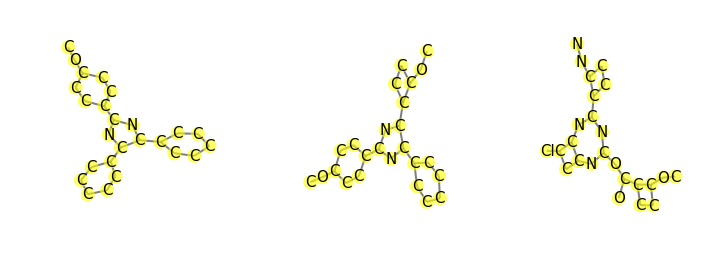

DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 9
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
sample failed; no propose after 20 successful improvement_steps
INFO:log:sample failed; no propose after 20 successful improvement_steps


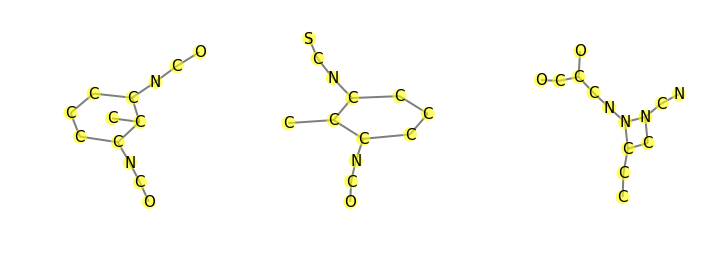

DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 2
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
sample failed; no propose after 11 successful improvement_steps
INFO:log:sample failed; no propose after 11 successful improvement_steps


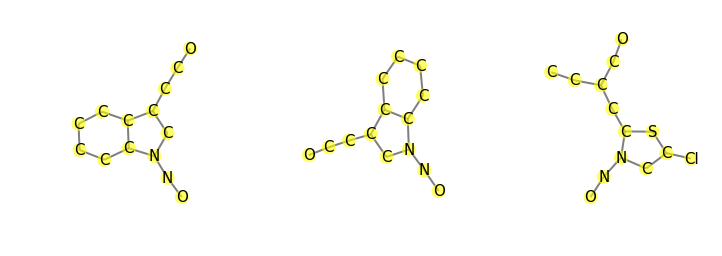

DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 3
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
sample failed; no propose after 29 successful improvement_steps
INFO:log:sample failed; no propose after 29 successful improvement_steps


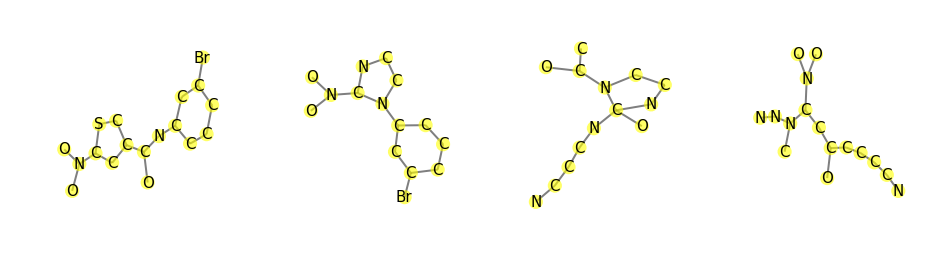

DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 2
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
sample failed; no propose after 43 successful improvement_steps
INFO:log:sample failed; no propose after 43 successful improvement_steps


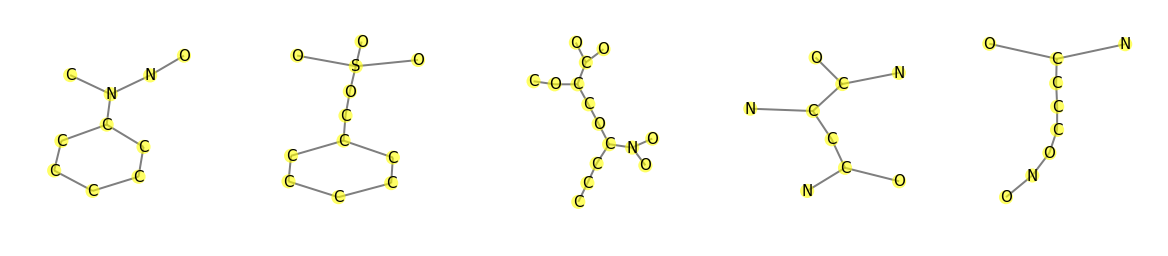

DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 8
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
sample failed; no propose after 1 successful improvement_steps
INFO:log:sample failed; no propose after 1 successful improvement_steps


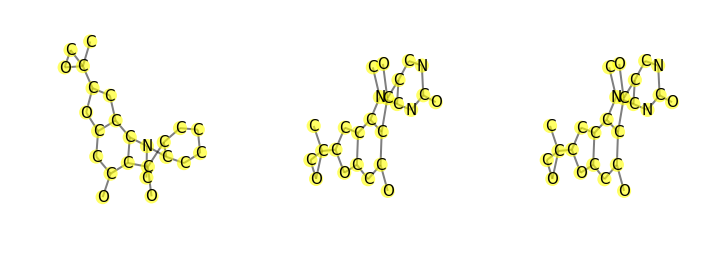

DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 4
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
sample failed; no propose after 25 successful improvement_steps
INFO:log:sample failed; no propose after 25 successful improvement_steps


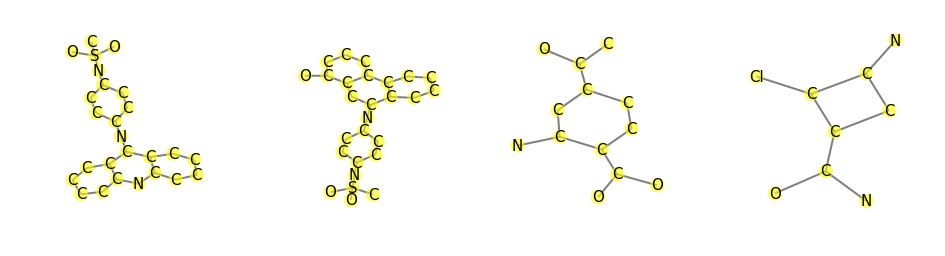

DEBUG:log:select_cips_from_grammar didn't find any acceptable cip; entries_found 79
DEBUG:log:propose failed;received 0 cips, all of which failed either at substitution or feasibility  
sample failed; no propose after 15 successful improvement_steps
INFO:log:sample failed; no propose after 15 successful improvement_steps


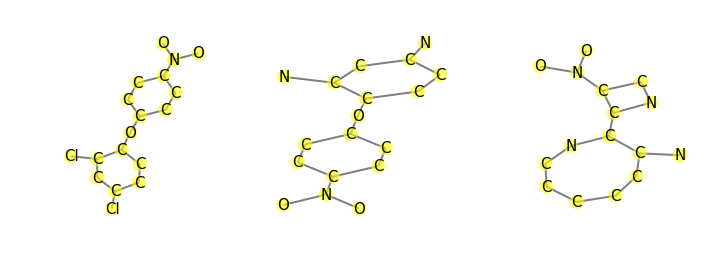

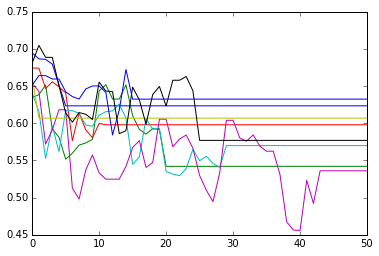

In [1]:
'''
now lets see if we can improve graphs
'''
import os
os.nice(19)
%matplotlib inline
import utils.draw as myutils
import graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
steps=50


sampler=gl.GraphLearnSampler()
sampler.load('data/demo.ge')
graphs = gspan_to_eden( 'data/bursi.pos.gspan' )
graphs = itertools.islice(graphs,8)
graphs = sampler.sample(graphs,same_radius=True,snapshot_interval=20,batch_size=1,n_steps=steps,n_jobs=0)

history=[]

for (result,info) in graphs:
    
    history.append(info['score_history'])
    myutils.drawgraphs(info['graphs'])
    
    
t = range(steps+1) 
for h in history:
    plt.plot(t, h)
plt.show()





In [ ]:
'''
inform me when done !
'''
import os
os.system("( speaker-test -t sine -f 1000 )& pid=$! ; sleep 0.5s ; kill -9 $pid")

In [ ]:
'''
demonstration of discussed thing :) 
'''

import networkx as nx

g=nx.Graph()
g.attrib= 5

h=g.copy()
print 'attrib' in g.__dict__

f=nx.Graph(g)
print 'attrib' in f.__dict__



g=nx.Graph()
g.add_path(["0","1"])
g.attrib=4
f=nx.Graph()
f.add_path(["0","1"])
G = nx.union(f,g , rename=('', '-'))
print 'attrib' in G.__dict__

In [ ]:
'''
HERE WE SEE WHY I USE SHUFFLE INSTEAD OF RANDOMCHOICE::: in the select_cips_from_grammar function...
-> pick at random as long as list of used indeces not as long as list?
-> leave it at the shuffeling?
'''
import random
%%time
x= range(1000000,0,-1)
for e in xrange(100):
    i=x.index(random.choice(x)) 
    x.remove(i)


In [ ]:
%%time
x= range(1000000,0,-1)
random.shuffle(x)
for e in xrange(100):
    i=x.pop() 


In [ ]:
o=Object()
o.n=3

In [1]:
d={'3':3,"4":4}
for e in d.keys():
    d.pop(e)

In [2]:
# here we see if g.zonk = g.graph['zonk']
import networkx as nx
G=nx.Graph()
G.zing=0
'zing' in G.graph


False

{}


now lets see if we can improve graphs

Brier scores: (the smaller the better)
No calibration: 0.104
With isotonic calibration: 0.085
With sigmoid calibration: 0.109


/usr/local/lib/python2.7/dist-packages/sklearn/calibration.py:147: UserWarning: GaussianNB does not support sample_weight. Samples weights are only used for the calibration itself.
  " itself." % estimator_name)


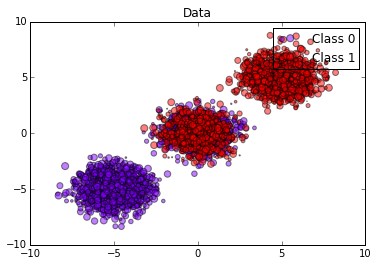

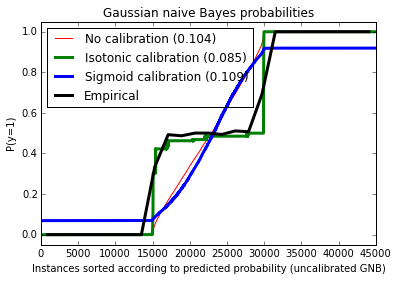

In [10]:
print(__doc__)

# Author: Mathieu Blondel <mathieu@mblondel.org>
#         Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#         Balazs Kegl <balazs.kegl@gmail.com>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import train_test_split


n_samples = 50000
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here

# Generate 3 blobs with 2 classes where the second blob contains
# half positive samples and half negative samples. Probability in this
# blob is therefore 0.5.
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

y[:n_samples // 2] = 0
y[n_samples // 2:] = 1
sample_weight = np.random.RandomState(42).rand(y.shape[0])

# split train, test for calibration
X_train, X_test, y_train, y_test, sw_train, sw_test = \
    train_test_split(X, y, sample_weight, test_size=0.9, random_state=42)

# Gaussian Naive-Bayes with no calibration
clf = GaussianNB()
clf.fit(X_train, y_train)  # GaussianNB itself does not support sample-weights
prob_pos_clf = clf.predict_proba(X_test)[:, 1]

# Gaussian Naive-Bayes with isotonic calibration
clf_isotonic = CalibratedClassifierCV(clf, cv=2, method='isotonic')
clf_isotonic.fit(X_train, y_train, sw_train)
prob_pos_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]

# Gaussian Naive-Bayes with sigmoid calibration
clf_sigmoid = CalibratedClassifierCV(clf, cv=2, method='sigmoid')
clf_sigmoid.fit(X_train, y_train, sw_train)
prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]

print("Brier scores: (the smaller the better)")

clf_score = brier_score_loss(y_test, prob_pos_clf, sw_test)
print("No calibration: %1.3f" % clf_score)

clf_isotonic_score = brier_score_loss(y_test, prob_pos_isotonic, sw_test)
print("With isotonic calibration: %1.3f" % clf_isotonic_score)

clf_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoid, sw_test)
print("With sigmoid calibration: %1.3f" % clf_sigmoid_score)

###############################################################################
# Plot the data and the predicted probabilities
plt.figure()
y_unique = np.unique(y)
colors = cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
for this_y, color in zip(y_unique, colors):
    this_X = X_train[y_train == this_y]
    this_sw = sw_train[y_train == this_y]
    plt.scatter(this_X[:, 0], this_X[:, 1], s=this_sw * 50, c=color, alpha=0.5,
                label="Class %s" % this_y)
plt.legend(loc="best")
plt.title("Data")

plt.figure()
order = np.lexsort((prob_pos_clf, ))
plt.plot(prob_pos_clf[order], 'r', label='No calibration (%1.3f)' % clf_score)
plt.plot(prob_pos_isotonic[order], 'g', linewidth=3,
         label='Isotonic calibration (%1.3f)' % clf_isotonic_score)
plt.plot(prob_pos_sigmoid[order], 'b', linewidth=3,
         label='Sigmoid calibration (%1.3f)' % clf_sigmoid_score)
plt.plot(np.linspace(0, y_test.size, 51)[1::2],
         y_test[order].reshape(25, -1).mean(1),
         'k', linewidth=3, label=r'Empirical')
plt.ylim([-0.05, 1.05])
plt.xlabel("Instances sorted according to predicted probability "
           "(uncalibrated GNB)")
plt.ylabel("P(y=1)")
plt.legend(loc="upper left")
plt.title("Gaussian naive Bayes probabilities")

plt.show()